[70 30] -1.076978987713555


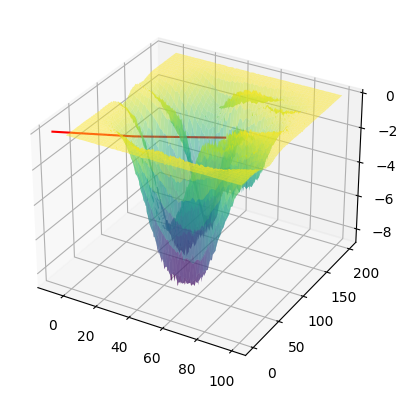

In [62]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt


def plot_map(path):
    map_data = loadmat(path)

    depth = map_data['Depth']
    home  = map_data['harbour'][0]
    xscale = map_data['xscale']
    yscale = map_data['yscale']
    print(home, depth[home[1], home[0]])
    X, Y = np.meshgrid(xscale, yscale)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot([home[0], home[1], -8], [home[0], home[1], 0] , c='r')    
    ax.plot_surface(X, Y, depth, cmap='viridis', edgecolor='none', alpha = 0.5)
plot_map('maps/Bolmen.mat')

In [123]:
# simulate brownian motion
def rBM(n, dt, x0, sigma):
    x = np.zeros((n, 2))
    x[0] = x0
    for i in range(1, n):
        x[i] = x[i-1] + np.random.normal(0, sigma, 2) * np.sqrt(dt)
    return x

x = rBM(10000, 0.1, [100, 100], 1)


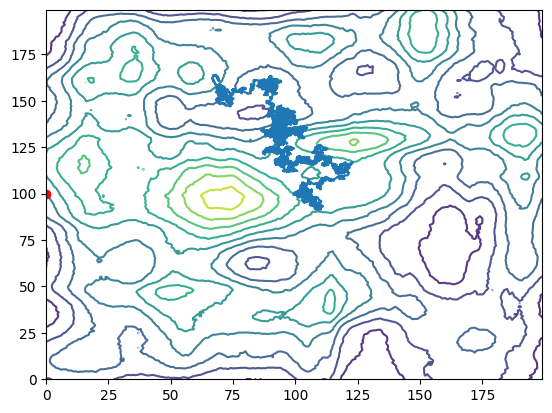

In [129]:
path = 'maps/Oresund.mat'
map_data = loadmat(path)
home  = map_data['harbour'][0]

depth = map_data['Depth']
fig, ax = plt.subplots()
ax.contour(depth, cmap='viridis', levels = 10, alpha = 0.9)
ax.plot(x[:, 0], x[:, 1])

ax.plot(home[0], home[1], 'ro')


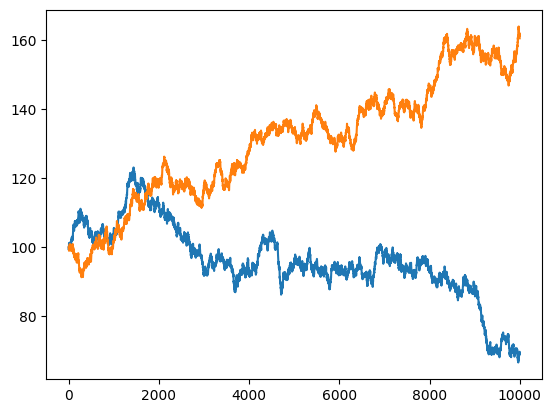

In [131]:
plt.plot(x[:,0])
plt.plot(x[:,1])



In [132]:
depth

array([[-16.68816625, -16.70885515, -16.53298238, ..., -18.38816297,
        -18.55098101, -18.65712433],
       [-16.3324841 , -16.36347744, -16.20649861, ..., -18.36244314,
        -18.45305183, -18.68457798],
       [-16.25571102, -16.14554612, -16.10616111, ..., -18.2542324 ,
        -18.49916021, -18.55294071],
       ...,
       [-19.45209874, -19.35927176, -19.25218907, ..., -17.78151205,
        -18.03368994, -18.32783568],
       [-19.42576707, -19.34091164, -19.33723323, ..., -17.86757779,
        -18.12946052, -18.36099332],
       [-19.45412609, -19.38149351, -19.30200671, ..., -17.9959859 ,
        -18.17110083, -18.42454585]])

# 


In [282]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

data = loadmat('maps/Oresund.mat')
depth = data['Depth']
xscale, yscale = data['xscale'], data['yscale']
X, Y = np.meshgrid(xscale, yscale)
measure = RegularGridInterpolator((xscale[0], yscale[0]), depth.T)
def rBM(n, dt, x0, sigma):
    x = np.zeros((n, 2))
    x[0] = x0
    for i in range(1, n):
        x[i] = x[i-1] + np.random.normal(0, sigma, 2) * np.sqrt(dt)
    return x


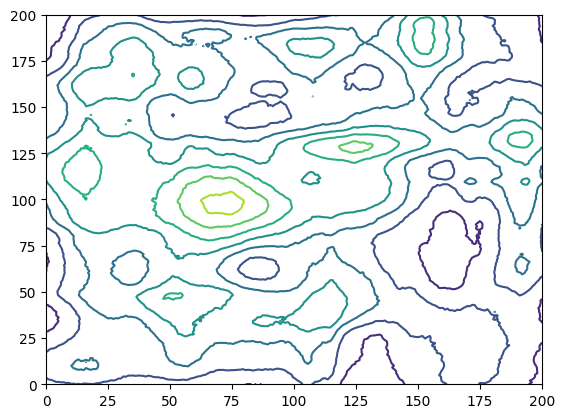

In [283]:
plt.contour(X, Y, depth)

0.9999999999999998 0.23585000000000006
0.9999999999999998 0.9662921348314605
0.9999999999999998 0.9167397981570865
1.0000000000000002 0.9999999999999998
0.9999999999999998 0.9222208926648321
1.0 0.9999999999999998
1.0 0.7162319968859479
nan 0.0
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


C:\Users\peter\AppData\Local\Temp\ipykernel_11552\2192162416.py:13: RuntimeWarning: invalid value encountered in divide
  P = Pobsx*prior/Pobs
C:\Users\peter\AppData\Local\Temp\ipykernel_11552\2192162416.py:16: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, P)


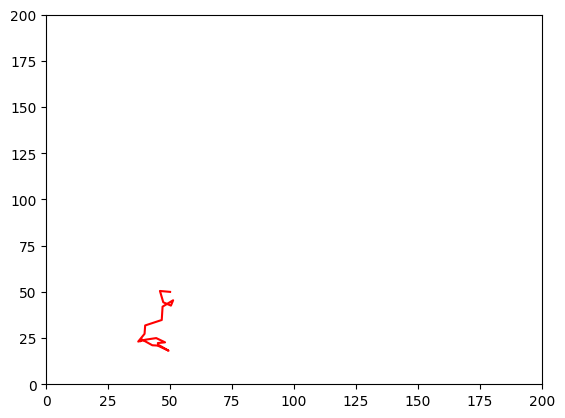

In [314]:
T = rBM(20, 10, [50, 50], 1)

prior = np.zeros(depth.shape)
N = np.sum(depth<0)
prior[depth<0] = 1/N

for x in T:
    true_depth = measure(x)
    noise = 0.15*2*(np.random.random_sample()-0.5)
    measurement = true_depth + noise
    Pobsx = ((depth<=measurement/1.15) & (measurement/0.85<=depth))
    Pobs = np.sum(Pobsx*prior)
    P = Pobsx*prior/Pobs
    prior = P  
    print(np.sum(P),Pobs)
plt.contour(X, Y, P)

plt.plot(T[:, 0], T[:, 1], 'r')

In [234]:
P.sum()

0.0

In [196]:
true_depth = measure()
noise = 0.15*2*(np.random.random_sample()-0.5)
measurement = true_depth + noise

prior = np.zeros(data['Depth'].shape)
N = np.sum(data['Depth']<0)
prior[data['Depth']<0] = 1/N

Pobsx = ((data['Depth']<=measurement/1.15) & (measurement/0.85<=data['Depth']))
Pobs = np.sum(Pobsx/np.size(data['Depth']))
P = Pobsx*prior/Pobs
plt.contour(X, Y, P, levels=15)

ValueError: One of the requested xi is out of bounds in dimension 0

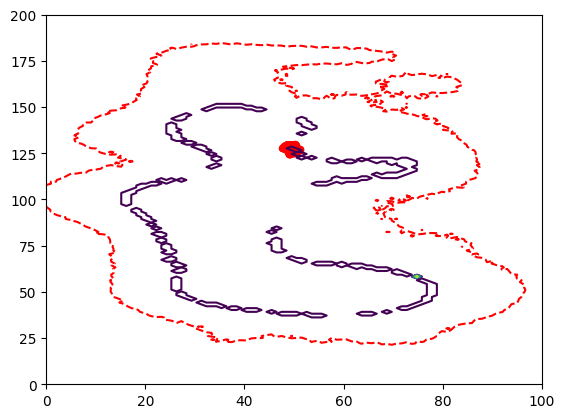

In [680]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.ndimage import laplace


def load_data(path):
    data = loadmat(path)
    depth = data['Depth']
    xscale, yscale = data['xscale'], data['yscale']
    X, Y = np.meshgrid(xscale, yscale)
    measure = RegularGridInterpolator((xscale[0], yscale[0]), depth.T)
    return measure, X, Y, depth

def measurement(x):
    measurement = measure(x)
    measurement *= np.random.uniform(0.85, 1.15)

    return measurement

def rBM(n, dt, x0, sigma):
    x = np.zeros((n, 2))
    x[0] = x0
    for i in range(1, n):
        x[i] = x[i-1] + np.random.normal(0, sigma, 2) * np.sqrt(dt)
    return x

def likelihood(measurement):
    Pobsx = ((depth<=measurement +0.15) & (measurement - 0.15 <=depth))
    return Pobsx

def time_step(P, dt, sigma):
    L = laplace(P)
    P = P + 1/2 * sigma**2 * L * dt
    return P

def data_update(prior, Pobsx):
    Pobs = np.sum(Pobsx*prior)
    P = Pobsx*prior/Pobs
    return P

measure, X, Y, depth = load_data('maps/Bolmen.mat')
dt = 1
sigma = 0.1
T = rBM(1000, dt, [50, 125], sigma)
measurement(T)
prior = np.zeros(depth.shape)
N = np.sum(depth<0)
prior[depth<0] = 1/N

for x in T:
    measurement = measure(x)
    Pobsx = likelihood(measurement)
    P = data_update(prior, Pobsx)
    prior = time_step(P, dt, sigma)

plt.contour(X, Y, P, levels=15)
plt.contour(X, Y, depth, levels=[-0.5], colors='r')
plt.scatter(T[:, 0], T[:, 1], s = 20, c = 'r', alpha = 1)

# mean position


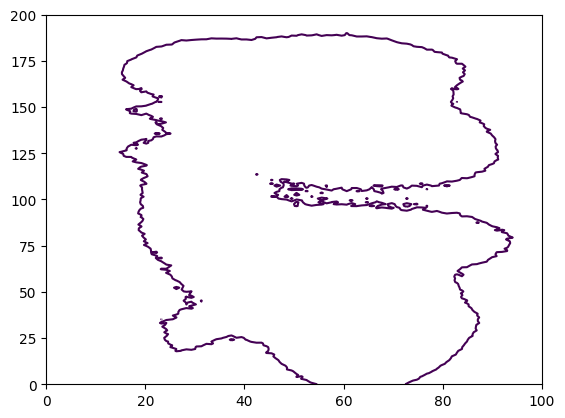

In [339]:
measure, X, Y, depth = load_data('maps/Ringsjon.mat')
plt.contour(X, Y, depth, levels=[-0.5])